<a href="https://colab.research.google.com/github/moreymat/scpo-data-science-bootcamp/blob/main/notebooks/2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular data analysis 1 : Exploring Open Food Facts data with pandas

In this series of notebooks, we are going to explore the data contained in the Open Food Facts database.

## Open Food Facts

Open Food Facts is an open, crowdsourced database on food products from around the world.

It is produced and managed as a digital commons.

Everyone can contribute data on packaged food products: pictures, ingredients, nutritional values etc.

This database has served as the foundation for many mobile phone apps, especially scanning apps to help customers while grocery shopping.

### Notions

* It is [*open*](https://en.wikipedia.org/wiki/Open_data): Anyone can freely use it, access it, modify it.
* It is [*crowdsourced*](https://en.wikipedia.org/wiki/Crowdsourcing) : Anyone can add new food products to the database, complete or modify existing data.
* It is a [knowledge commons](https://en.wikipedia.org/wiki/Knowledge_commons), a type of [digital commons](https://en.wikipedia.org/wiki/Digital_commons_(economics)).

### Browsing through the dataset

The Open Food Facts database is [available online](https://world.openfoodfacts.org/).

Take a few minutes to explore the database through its online interface.

* How is each product described ?
* What types of information are provided ?

### Understanding the dataset

To really understand a dataset, you need to read its documentation so that you are able to answer a set of common, basic questions that will help guide your analysis, such as :

* Who created this dataset and for what purpose ?
* How was the dataset created ?
* What do the instances that comprise the dataset represent (eg. people, companies, events, photos...) ?
* What data does each instance consist of ? Are they "raw" data or (computed) features ?
* Are the instances related in some way ? If so, are there specific fields that enable cross-reference ?

The documentation for a dataset is always written with some purpose, for an intended type of reader, in a certain context, hence it is very likely that you will not find all the answers in the documentation.

Here, you can gather partial information on OFF from :

* the [presentation of the project](https://world.openfoodfacts.org/discover)
* various pages of the [wiki](https://wiki.openfoodfacts.org/Main_Page), mostly :
  * [Data fields](https://wiki.openfoodfacts.org/Data_fields)
  * [Ingredients](https://wiki.openfoodfacts.org/Ingredients)
  * [Data Quality](https://wiki.openfoodfacts.org/Data_quality)

#### To go further

* [Datasheets for datasets](https://arxiv.org/pdf/1803.09010.pdf) are a standardized documentation process and format proposed by AI researchers to facilitate the proper (re-)use of datasets and avoid common pitfalls in designing AI components (and ensuing scandals when they exhibit problematic biases in deployment)

Equipped with this new knowledge about the Open Food Facts database, you can start the exploratory analysis of the data to gather the missing information to complete your answers, and ask questions of your own.


### Open Food Facts as a tabular dataset

The entire set of facts about all the products in the Open Food Facts database can be represented as a *tabular dataset*, that is a table of data where :

* each row is a product,
* each column is a field (eg. "brand", "barcode", "energy for 100g"...),
* each cell contains the value of a field for a product.


The simplest and most common format used for tabular datasets is the [CSV format](https://en.wikipedia.org/wiki/Comma-separated_values).
CSV files can be opened in a spreadsheet software such as Microsoft Excel, Apple Numbers or LibreOffice Calc, or just any plain text editor.

The Open Food Facts database is [available for download in various formats](https://world.openfoodfacts.org/data), including the CSV format.

Because the whole dataset is too big (the CSV export, uncompressed, weighs 9 GB as of 2024-07-19), we will work on a filtered subset of the dataset where we only keep products with :

* a non-ambiguous barcode in the [EAN-8](https://en.wikipedia.org/wiki/EAN-8) or [EAN-13](https://en.wikipedia.org/wiki/International_Article_Number) formats ;
* a product name,
* brands,
* an image URL for the product ;
* a category ;
* basic nutritional values.

### Accessing the data



You need two files (csv and txt) that are on the Google Drive of my Sciences Po account :

* [data file (csv)](https://drive.google.com/file/d/1vBIU1Mgnh9hiDFrmWV88w6lhY2WZ9_Vg/view?usp=sharing),
* [metadata file (txt)](https://drive.google.com/file/d/1bAUsUzugSGOgkQGjHo1K9RlKO4SORQXW/view?usp=sharing) (column types, so that pandas does not have to guess them).

For **each of these 2 files**:
1. Open the link
2. Click on the "Add shortcut to Drive" button
<center>
<img src="https://github.com/moreymat/scpo-data-science-bootcamp/raw/main/notebooks/img/drive-1.png" width=400>
</center>
3. In the menu, click on "My Drive"
<center>
<img src="https://github.com/moreymat/scpo-data-science-bootcamp/raw/main/notebooks/img/drive-2.png" width=400>
</center>
4. Click on "Add shortcut here"
<center>
<img src="https://github.com/moreymat/scpo-data-science-bootcamp/raw/main/notebooks/img/drive-3.png" width=400>
</center>

This will add shortcuts, in your Sciences Po (Google) drive, to the files stored on Mathieu's Sciences Po (Google) Drive.

Then you need to authorize Colab to access files (here shortcuts) on your Drive.

Execute the following cell, a pop-up will appear asking you to select your Sciences Po (Google) account, then asking you to authorize access.

In [1]:
# enable Colab to access files (here shortcuts) on your Drive
# from google.colab import drive

# drive.mount("/content/drive")

The files can now be accessed from the shortcuts on your drive.

## The pandas library for tabular data analysis

### Gaining functionalities with libraries

The Python standard library includes a module named [csv](https://docs.python.org/3/library/csv.html#module-csv) that provides very basic support to read and write CSV files.
This module enables you to read and write values, but nothing more.

It gives you no way to :

* rename columns ;
* filter columns, eg. keep only the columns for nutritional values ;
* filter rows, eg. select all products that are categorized as "Sweet spreads" ;
* compute summary statistics on columns across rows, eg. compute the min, max, mean and median of fiber content per 100g ;
* compare columns, eg. test whether they contain the same values ;
* etc.

As we saw in the 1st and 2nd notebooks, this can be remedied by using an additional [software library](https://en.wikipedia.org/wiki/Library_(computing)), which is, roughly speaking, a collection of code that provides functionalities to perform operations on a given task or domain .

The most widely used library in Python to work on tabular datasets is [pandas](https://pandas.pydata.org/).

We need to import pandas and, for technical reasons, a specific pandas data type to load [categorical variables with ordered values](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#controlling-behavior).

We will use a custom utility function, `load_off`, to load the Open Food Facts dataset and convert a column.

> **NOTE** You do not need to understand or even look at the code in the next cell. It uses a few Python functions and technical notions (file input and output, evaluation) that we cannot introduce properly in the time allocated to this course, and are beyond the objectives of this bootcamp.
However, feel free to ask Mathieu questions if you are curious !

In [2]:
# (just execute this cell)

# import pandas
import csv
import pandas as pd

# we need this data type for ordered categoricals
from pandas.api.types import CategoricalDtype

# lift some limitations in column width, so more cell values are displayed in full
pd.set_option("display.max_colwidth", 110)

# dataset and data type of the columns
FOLDER = "../data/processed"  # "drive/MyDrive"
OFF_FILE = f"{FOLDER}/off_products_subset.csv"
DTYPE_FILE = f"{FOLDER}/dtype.txt"


# custom function to load the Open Food Facts subset
def load_off():
    """Load the filtered subset of Open Food Facts.

    Returns
    -------
    df : pd.DataFrame
      (A filtered subset of the) Open Food Facts tabular dataset.
    """
    # load the data types for the columns
    with open(DTYPE_FILE) as f:
        dtype = eval(f.read())

    # load the dataset
    df = pd.read_csv(OFF_FILE, sep="\t", dtype=dtype, quoting=csv.QUOTE_NONE)
    # convert columns with datetimes
    for col_name in (
        "created_datetime",
        "last_modified_datetime",
        "last_updated_datetime",
        "last_image_datetime",
    ):
        # ISO 8601 dates
        df[col_name] = pd.to_datetime(df[col_name])
    #
    return df


# load the dataset (takes around 60 seconds)
df = load_off()

If all went fine, you do not see anything.

What have we read, really ?

You remember that typing the name of a variable, as the only (or last) line of a notebook cell, prints its value.

Type the name of the variable containing the dataset, to display the value (content) of that variable.

In [3]:
df

,code,url,creator,created_datetime,last_modified_datetime,last_modified_by,last_updated_datetime,product_name,generic_name,quantity,...,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,0000101209159,http://world-en.openfoodfacts.org/product/0000101209159/veritable-pate-a-tartiner-noisettes-chocolat-noir-...,kiliweb,2018-02-22 10:56:57+00:00,2023-04-28 23:59:01+00:00,roboto-app,2024-02-09 14:48:49+00:00,Véritable pâte à tartiner noisettes chocolat noir,<NA>,350 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
1,0000131327786,http://world-en.openfoodfacts.org/product/0000131327786/lime-cordial-sainsbury-s,blakejones99,2024-06-01 20:48:44+00:00,2024-06-01 22:13:50+00:00,roboto-app,2024-06-01 22:13:50+00:00,Lime Cordial,<NA>,1l,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,<NA>
2,0000155011159,http://world-en.openfoodfacts.org/product/0000155011159/mini-chaussons-a-la-compote-de-pomme-intermarche,kiliweb,2021-12-16 21:00:16+00:00,2021-12-17 08:10:31+00:00,ecoscore-impact-estimator,2024-02-12 13:34:36+00:00,Mini chaussons à la compote de pomme,<NA>,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.350000,15
3,0000159487776,http://world-en.openfoodfacts.org/product/0000159487776/milkyway-magic-stars-chocolates,usda-ndb-import,2017-03-09 16:01:56+00:00,2020-04-22 20:31:56+00:00,org-database-usda,2024-02-09 14:48:51+00:00,"Milkyway, magic stars chocolates",<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,<NA>
4,0000182006180,http://world-en.openfoodfacts.org/product/0000182006180/knusper-musli-mango-gut-bio,tobiasseidel,2024-01-19 06:22:10+00:00,2024-01-19 06:32:48+00:00,tobiasseidel,2024-02-14 06:14:40+00:00,Knusper-Müsli Mango,<NA>,500g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.500000,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778720,9999941860884,http://world-en.openfoodfacts.org/product/9999941860884/tofu-nature-taifun,kiliweb,2023-01-29 09:29:23+00:00,2023-03-28 11:24:20+00:00,itsjustruby,2024-02-14 01:54:10+00:00,Tofu nature,<NA>,200g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,-3
778721,9999991042704,http://world-en.openfoodfacts.org/product/9999991042704/yaourt-vanille-patapain,kiliweb,2018-05-09 10:46:24+00:00,2024-06-16 21:10:13+00:00,geodata,2024-06-16 21:10:13+00:00,Yaourt vanille,<NA>,120 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7
778722,9999991149090,http://world-en.openfoodfacts.org/product/9999991149090/riz-parfume-king-elephant,kiliweb,2018-02-20 17:07:29+00:00,2018-12-20 20:51:04+00:00,roboto-app,2024-02-10 21:06:07+00:00,Riz parfumé,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
778723,9999994666013,http://world-en.openfoodfacts.org/product/9999994666013/skimmed-milk-tesco,jrg2024,2024-06-10 07:11:28+00:00,2024-06-10 07:24:04+00:00,roboto-app,2024-06-10 07:24:04+00:00,Skimmed Milk,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1


The dataset is loaded in a pandas DataFrame, a type of object described in the [pandas intro tutorial 01](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html).

By default pandas displays the column headers, the first and last five rows with their row index, the total number of rows and columns.

**Question** How many rows and columns does the table contain in total ?

### First glance at the dataset

You can display the first `n` entries of a Dataframe with the DataFrame method [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html), and the last `n` entries with [tail](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail).

> **HINT**: Remember that methods are attached to an object, and are called with the dot notation.

You can call [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) with no parameter.

In [4]:
# (just execute this cell)
df.head()

,code,url,creator,created_datetime,last_modified_datetime,last_modified_by,last_updated_datetime,product_name,generic_name,quantity,...,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,0000101209159,http://world-en.openfoodfacts.org/product/0000101209159/veritable-pate-a-tartiner-noisettes-chocolat-noir-...,kiliweb,2018-02-22 10:56:57+00:00,2023-04-28 23:59:01+00:00,roboto-app,2024-02-09 14:48:49+00:00,Véritable pâte à tartiner noisettes chocolat noir,<NA>,350 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
1,0000131327786,http://world-en.openfoodfacts.org/product/0000131327786/lime-cordial-sainsbury-s,blakejones99,2024-06-01 20:48:44+00:00,2024-06-01 22:13:50+00:00,roboto-app,2024-06-01 22:13:50+00:00,Lime Cordial,<NA>,1l,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,<NA>
2,0000155011159,http://world-en.openfoodfacts.org/product/0000155011159/mini-chaussons-a-la-compote-de-pomme-intermarche,kiliweb,2021-12-16 21:00:16+00:00,2021-12-17 08:10:31+00:00,ecoscore-impact-estimator,2024-02-12 13:34:36+00:00,Mini chaussons à la compote de pomme,<NA>,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.35,15
3,0000159487776,http://world-en.openfoodfacts.org/product/0000159487776/milkyway-magic-stars-chocolates,usda-ndb-import,2017-03-09 16:01:56+00:00,2020-04-22 20:31:56+00:00,org-database-usda,2024-02-09 14:48:51+00:00,"Milkyway, magic stars chocolates",<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,<NA>
4,0000182006180,http://world-en.openfoodfacts.org/product/0000182006180/knusper-musli-mango-gut-bio,tobiasseidel,2024-01-19 06:22:10+00:00,2024-01-19 06:32:48+00:00,tobiasseidel,2024-02-14 06:14:40+00:00,Knusper-Müsli Mango,<NA>,500g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.50,-3


You can call `head` with a parameter `n=7` (or just `7`) to display the first 7 entries.

In [5]:
df.head(n=7)  # or: df.head(7)

,code,url,creator,created_datetime,last_modified_datetime,last_modified_by,last_updated_datetime,product_name,generic_name,quantity,...,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,0000101209159,http://world-en.openfoodfacts.org/product/0000101209159/veritable-pate-a-tartiner-noisettes-chocolat-noir-...,kiliweb,2018-02-22 10:56:57+00:00,2023-04-28 23:59:01+00:00,roboto-app,2024-02-09 14:48:49+00:00,Véritable pâte à tartiner noisettes chocolat noir,<NA>,350 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
1,0000131327786,http://world-en.openfoodfacts.org/product/0000131327786/lime-cordial-sainsbury-s,blakejones99,2024-06-01 20:48:44+00:00,2024-06-01 22:13:50+00:00,roboto-app,2024-06-01 22:13:50+00:00,Lime Cordial,<NA>,1l,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,<NA>
2,0000155011159,http://world-en.openfoodfacts.org/product/0000155011159/mini-chaussons-a-la-compote-de-pomme-intermarche,kiliweb,2021-12-16 21:00:16+00:00,2021-12-17 08:10:31+00:00,ecoscore-impact-estimator,2024-02-12 13:34:36+00:00,Mini chaussons à la compote de pomme,<NA>,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.35,15
3,0000159487776,http://world-en.openfoodfacts.org/product/0000159487776/milkyway-magic-stars-chocolates,usda-ndb-import,2017-03-09 16:01:56+00:00,2020-04-22 20:31:56+00:00,org-database-usda,2024-02-09 14:48:51+00:00,"Milkyway, magic stars chocolates",<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,<NA>
4,0000182006180,http://world-en.openfoodfacts.org/product/0000182006180/knusper-musli-mango-gut-bio,tobiasseidel,2024-01-19 06:22:10+00:00,2024-01-19 06:32:48+00:00,tobiasseidel,2024-02-14 06:14:40+00:00,Knusper-Müsli Mango,<NA>,500g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.50,-3
5,0000204286484,http://world-en.openfoodfacts.org/product/0000204286484/mehrkomponeneten-protein-90-c6-haselnuss-allfitnes...,allfitnessfactory-de,2016-12-30 12:12:46+00:00,2022-02-11 10:33:11+00:00,packbot,2024-02-09 14:48:51+00:00,Mehrkomponeneten Protein 90 C6 Haselnuß,Mehrkomponeneten Protein in Haselnuß Geschmack,"2,5 kg",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,<NA>
6,0000209773750,http://world-en.openfoodfacts.org/product/0000209773750/tortitas-de-trigo-roti-wraps-lidl,kiliweb,2021-06-12 08:56:14+00:00,2023-12-04 19:29:11+00:00,mariacastiel,2024-02-13 15:27:29+00:00,Tortitas de trigo- Roti wraps,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


You can call [tail](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail) with no parameter.

In [6]:
df.tail()

,code,url,creator,created_datetime,last_modified_datetime,last_modified_by,last_updated_datetime,product_name,generic_name,quantity,...,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
778720,9999941860884,http://world-en.openfoodfacts.org/product/9999941860884/tofu-nature-taifun,kiliweb,2023-01-29 09:29:23+00:00,2023-03-28 11:24:20+00:00,itsjustruby,2024-02-14 01:54:10+00:00,Tofu nature,<NA>,200g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,-3
778721,9999991042704,http://world-en.openfoodfacts.org/product/9999991042704/yaourt-vanille-patapain,kiliweb,2018-05-09 10:46:24+00:00,2024-06-16 21:10:13+00:00,geodata,2024-06-16 21:10:13+00:00,Yaourt vanille,<NA>,120 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7
778722,9999991149090,http://world-en.openfoodfacts.org/product/9999991149090/riz-parfume-king-elephant,kiliweb,2018-02-20 17:07:29+00:00,2018-12-20 20:51:04+00:00,roboto-app,2024-02-10 21:06:07+00:00,Riz parfumé,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
778723,9999994666013,http://world-en.openfoodfacts.org/product/9999994666013/skimmed-milk-tesco,jrg2024,2024-06-10 07:11:28+00:00,2024-06-10 07:24:04+00:00,roboto-app,2024-06-10 07:24:04+00:00,Skimmed Milk,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1
778724,9999999175305,http://world-en.openfoodfacts.org/product/9999999175305/erdbeerkuchen-1019g-tiefgefroren-coppenrath-wiese,sil,2019-12-22 08:13:01+00:00,2022-02-11 08:41:07+00:00,packbot,2024-02-11 08:10:01+00:00,Erdbeerkuchen 1019g tiefgefroren,<NA>,"1,019 kg",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.014794,12


You can call `tail` with a parameter `3` to display the last 3 entries.

In [7]:
df.tail(n=3)

,code,url,creator,created_datetime,last_modified_datetime,last_modified_by,last_updated_datetime,product_name,generic_name,quantity,...,vitamin-a_100g,vitamin-d_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
778722,9999991149090,http://world-en.openfoodfacts.org/product/9999991149090/riz-parfume-king-elephant,kiliweb,2018-02-20 17:07:29+00:00,2018-12-20 20:51:04+00:00,roboto-app,2024-02-10 21:06:07+00:00,Riz parfumé,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
778723,9999994666013,http://world-en.openfoodfacts.org/product/9999994666013/skimmed-milk-tesco,jrg2024,2024-06-10 07:11:28+00:00,2024-06-10 07:24:04+00:00,roboto-app,2024-06-10 07:24:04+00:00,Skimmed Milk,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-1
778724,9999999175305,http://world-en.openfoodfacts.org/product/9999999175305/erdbeerkuchen-1019g-tiefgefroren-coppenrath-wiese,sil,2019-12-22 08:13:01+00:00,2022-02-11 08:41:07+00:00,packbot,2024-02-11 08:10:01+00:00,Erdbeerkuchen 1019g tiefgefroren,<NA>,"1,019 kg",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.014794,12


**Hint** Some URLs are longer than the maximal displayed text length for a cell (by default 80 characters, that is explicitly raised at the beginning of this notebook to 110). This will make it harder for you to consult the product page on the OFF website.
You can use the `values` attribute to get the complete array of values for a (subset of a) DataFrame, or of a column (Series).

In [8]:
# (just execute this cell)
# display the arrays of values of all fields for the first 2 products
# NB : each entry has 2 URLs : one for the product page, one for its (small-sized) image
df.head(n=2).values

array([['0000101209159',
        'http://world-en.openfoodfacts.org/product/0000101209159/veritable-pate-a-tartiner-noisettes-chocolat-noir-bovetti',
        'kiliweb', Timestamp('2018-02-22 10:56:57+0000', tz='UTC'),
        Timestamp('2023-04-28 23:59:01+0000', tz='UTC'), 'roboto-app',
        Timestamp('2024-02-09 14:48:49+0000', tz='UTC'),
        'Véritable pâte à tartiner noisettes chocolat noir', <NA>,
        '350 g', <NA>, <NA>, 'Bovetti',
        'Breakfasts,Spreads,Sweet spreads,fr:Pâtes à tartiner,Hazelnut spreads,Chocolate spreads,Cocoa and hazelnuts spreads',
        <NA>, <NA>, 'No gluten,No palm oil', <NA>, <NA>, <NA>, 'France',
        <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, nan, nan, <NA>, <NA>, 23,
        'e', nan, 'Sugary snacks', 'Sweets', 'Sugary snacks,Sweets',
        'To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date completed,Packaging code to be completed,Characteristics to be completed,Origins to be completed,Categories compl

### About the data table

We can display a summary of the DataFrame with `info`, including for each column its index, name, number of non-null values, and data type (`dtype`).
For more information, you can read the [pandas intro tutorial 02](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778725 entries, 0 to 778724
Data columns (total 76 columns):
 #   Column                                                 Non-Null Count   Dtype              
---  ------                                                 --------------   -----              
 0   code                                                   778725 non-null  string             
 1   url                                                    778725 non-null  string             
 2   creator                                                778724 non-null  category           
 3   created_datetime                                       778725 non-null  datetime64[ns, UTC]
 4   last_modified_datetime                                 778725 non-null  datetime64[ns, UTC]
 5   last_modified_by                                       772572 non-null  category           
 6   last_updated_datetime                                  766338 non-null  datetime64[ns, UTC]
 7   product_nam

`info` also displays the total memory usage of the DataFrame.

However, by default, `info` roughly estimates the memory usage.

Call `info` with the parameter `memory_usage=deep` (see the documentation for [DataFrame.info](https://pandas.pydata.org/pandas-docs/version/2.0/reference/api/pandas.DataFrame.info.html#pandas-dataframe-info) ).

In [10]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778725 entries, 0 to 778724
Data columns (total 76 columns):
 #   Column                                                 Non-Null Count   Dtype              
---  ------                                                 --------------   -----              
 0   code                                                   778725 non-null  string             
 1   url                                                    778725 non-null  string             
 2   creator                                                778724 non-null  category           
 3   created_datetime                                       778725 non-null  datetime64[ns, UTC]
 4   last_modified_datetime                                 778725 non-null  datetime64[ns, UTC]
 5   last_modified_by                                       772572 non-null  category           
 6   last_updated_datetime                                  766338 non-null  datetime64[ns, UTC]
 7   product_nam

**Question.** How much memory does the dataset occupy, when loaded?

### Examining a column

How can we get a general idea of the content of a given column, for instance `nutriscore_grade` ?

One way to do this is to select the column and ask for its distinct values, using the function [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html#pandas.Series.unique):

In [11]:
# (just execute this cell)
df["nutriscore_grade"].unique()

['e', NaN, 'd', 'a', 'c', 'b']
Categories (5, object): ['a' < 'b' < 'c' < 'd' < 'e']

We selected the column `df["nutriscore_grade"]`, then called the `unique()` function on this column (with a dot operator: `.unique()`).



The column `nutriscore_grade` contains values 'a', 'b', 'c', 'd', 'e' (listed in their order of appearance in the dataset), plus a special value `NaN` ("Not a Number") for missing values.

To get a slightly better idea, we would want to know how many products are in each category, ie. how many times each category occurs in the column.

We can select the column, as above, then call the function [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) instead of `unique`.

In [12]:
df["nutriscore_grade"].value_counts()

nutriscore_grade
d    189568
c    141295
e    115130
a    111371
b     95266
Name: count, dtype: int64

In order of decreasing frequency:
- 189,568 products in our dataset have Nutriscore grade 'd',
- 141,295 are 'c',
- 115,130 are 'e',
- 111,371 are 'a',
- 95,266 are 'b'.

If we were working within a spreadsheet software, at this point we would probably feel the urge to plot these values.

pandas enables to do that easily with the [plot function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html).

<Axes: xlabel='nutriscore_grade'>

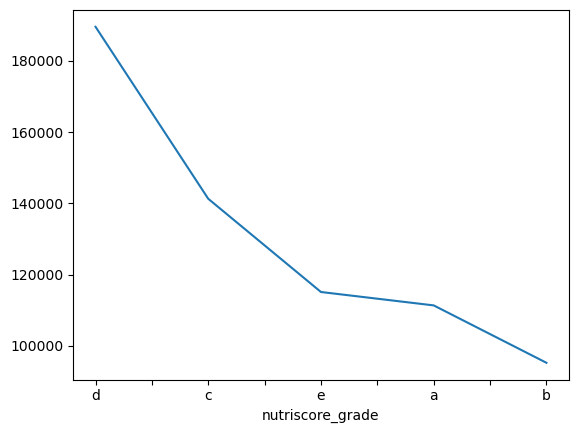

In [13]:
# (just execute this cell)
df["nutriscore_grade"].value_counts().plot()

The resulting plot does display the data but is far from ideal:
The number of occurrences of each value in a given column would be better visualized as a *bar plot*.

We can change the type of graph by calling `plot()` with the parameter `kind="bar"`.

<Axes: xlabel='nutriscore_grade'>

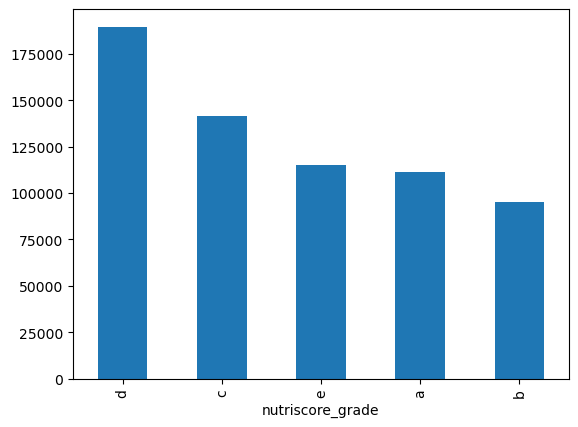

In [14]:
# (just execute this cell)
df["nutriscore_grade"].value_counts().plot(kind="bar")

This plot could be improved in many ways: Axes could have more informative or better looking labels, grades could be displayed in their "natural" ordering, bars could have different colors...

When we focus on data visualization in notebook 4, we will use a companion library named `seaborn` that provides easy access to the most common customization options, as well as advanced types of data visualizations.

But for now, the basic plotting capability of pandas will do.

What about columns containing numeric values, such as `fat_100g`? Are they easier to examine visually with pandas?

Build a histogram of the column `fat_100g`.

> **HINT** Use the function [plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html), this time with the parameter `kind="hist"`.

<Axes: ylabel='Frequency'>

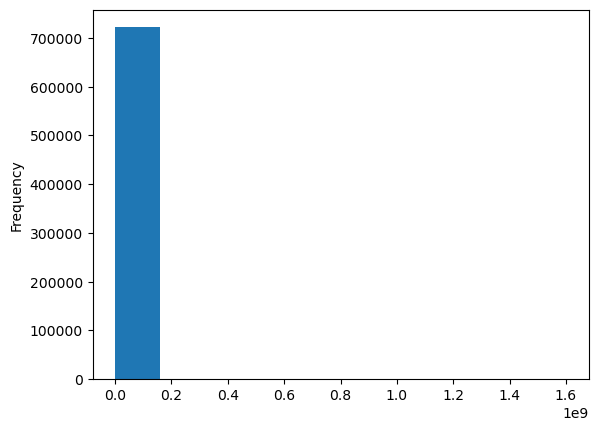

In [15]:
#
df["fat_100g"].plot(kind="hist")

The plot highlights that, for more than 700,000 products in our dataset, the amount of fat per 100 g of product is between 0 and (approximately) 0.16 * 1e9 grams = 160,000,000 grams.


This is slightly concerning on two respects:
1. we would expect this to hold true for all 778,725 products in our dataset, wouldn't we?
2. is there any reason for the graph to have an x-axis go as high as 160,000,000 grams, and squeeze all (or almost all?) values in one bar on the left?

We should probably have a better look at the values in this column, in particular look for:
1. missing values and
2. extreme values.

The number of missing values in a column can be retrieved by selecting the column and calling [info](https://pandas.pydata.org/docs/reference/api/pandas.Series.info.html?highlight=info#pandas.Series.info).

In [16]:
# select the column, then call info()
df["fat_100g"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 778725 entries, 0 to 778724
Series name: fat_100g
Non-Null Count   Dtype  
--------------   -----  
722357 non-null  float64
dtypes: float64(1)
memory usage: 5.9 MB


The output of `info` states that the column contains 778,725 entries, of which 722,357 are non-null, ie. values that are not missing.

This explains why the bar on the left of the plot culminates just above 700,000, but does not get close to 800,000 which would be the next tick on the y-axis.

But why does the x-axis go as high as 160,000,000?
We certainly do not expect any product to contain 160,000,000 g of fat per 100 g of product, do we?

Let us examine the distribution of the values in the `fat_100g` column, with the function [describe](https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html#pandas.Series.describe):

In [17]:
# select the column, then call describe()
df["fat_100g"].describe()

count    7.223570e+05
mean     2.229801e+03
std      1.882539e+06
min      0.000000e+00
25%      1.000000e+00
50%      6.700000e+00
75%      2.100000e+01
max      1.600000e+09
Name: fat_100g, dtype: float64

- The mean value is `2,229`, ie. products contain more than 2,000 g of fat per 100g on average;
- The minimum value is `0`, ie. some products do not contain any fat;
- 25% of products contain less than 1.0 g of fat per 100 g;
- 50% of products contain less than 6.7 g of fat per 100 g;
- 75% of products contain less than 21 g of fat per 100g;
- The maximum value is 160,000,000, ie. a product is described as containing 29,000 g of fat per 100 g.

Each of these points is consistent with our common sense assumptions, except for the first and last one.

At least one value in this column is extremely high, which implies that:
- either we need to revise our assumptions, and accept that products can have a declared amount of fat per 100 g that is extremely high ;
- or some entries are erroneous.

If the former is true, then given the size of the dataset, we would expect other products to have a very high value in this column.

Let us sort the values in the column **in decreasing order**, using [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html) with argument `ascending=False`.

In [18]:
# ...
df["fat_100g"].sort_values(ascending=False)

50040     1.600000e+09
778056    6.784540e+05
535968    3.631000e+03
576754    2.308000e+03
442191    1.972000e+03
              ...     
778691             NaN
778699             NaN
778702             NaN
778707             NaN
778715             NaN
Name: fat_100g, Length: 778725, dtype: float64

The 5 highest values are, in decreasing order: 160,000,000 ; 678,454 ; 3,631 ; 2,308 ; 1,972.



Are there many more values that are unexpectedly high, or are they isolated outliers ?

Let us use the `head` function, that we discovered earlier, on the sorted column to look at the 60 highest values in the column.

You need to select the column, sort its values in decreasing order, and display the first 60 values.

In [19]:
# ...
df["fat_100g"].sort_values(ascending=False).head(n=60)

50040     1.600000e+09
778056    6.784540e+05
535968    3.631000e+03
576754    2.308000e+03
442191    1.972000e+03
55230     1.900000e+03
529681    1.804000e+03
6495      1.605263e+03
1308      1.600000e+03
760597    1.000000e+03
79851     8.000000e+02
73478     8.000000e+02
62403     8.000000e+02
536199    7.080000e+02
25334     5.000000e+02
17769     5.000000e+02
513542    5.000000e+02
751528    4.670000e+02
27629     4.600000e+02
351455    4.020000e+02
53773     4.000000e+02
83522     4.000000e+02
16437     3.333333e+02
472077    3.235294e+02
9667      3.064286e+02
674816    3.060000e+02
65677     3.000000e+02
516546    3.000000e+02
71259     2.610000e+02
758521    2.480000e+02
775479    2.340000e+02
69468     2.250000e+02
456566    2.190000e+02
739372    2.130000e+02
76829     2.110000e+02
725630    1.900000e+02
199425    1.750000e+02
27076     1.730000e+02
76880     1.600000e+02
571193    1.540000e+02
536073    1.500000e+02
88375     1.500000e+02
769486    1.500000e+02
41088     1

The maximum is a clear outlier.
The 60th highest value in the column is 106 which is higher than our assumptions would allow, but the values decrease quickly so we might just have a small proportion of erroneous values in our column.

We would need to continue our investigation to get a better overview of these high values:
* How many are they?
* Does a pattern emerge in the numerical values themselves?
* Does a pattern emerge if we look at some of the other columns for these products?


For the time being, let us plot the `fat_100g` column without these 60 highest values, and see what the huge majority of the values look like overall.

We will learn cleaner, and simpler, ways to do this, but for the time being, let us plot the `fat_100g` column without these 60 highest values and get a better picture of the huge majority of the values in that column.


A quick and dirty version, using the functions we have seen so far, could be:
1. select the column,
2. sort the values in decreasing order,
3. keep all values except for the first 60,
4. plot them.

>**HINT** In our dataset of 778,725 entries, excluding the 60 highest values amounts to selecting the last 778,665 values, with the `tail` function.

<Axes: ylabel='Frequency'>

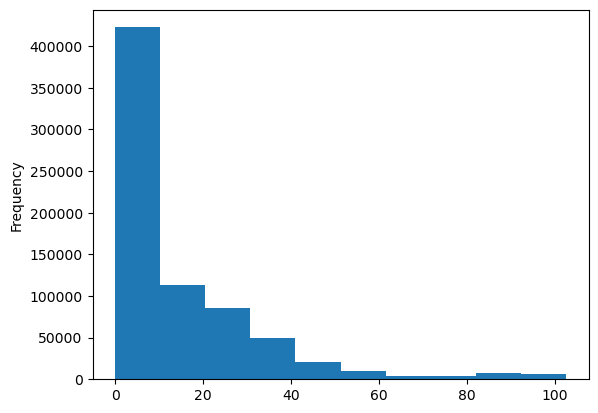

In [20]:
# ...
df["fat_100g"].sort_values(ascending=False).tail(778665).plot(kind="hist")

>**HINT** Do not forget to specify the kind of plot you want.

The x-axis is now limited to a range of 0 to (approximately) 104.

Almost all values are below 100, and the distribution seems consistent with the summary statistics (min, 25%, 50%, 75%) we obtained earlier from the `describe()` function.

## Conclusion

The plots we built up to this point are quite basic, as are the manipulations we performed on the Open Food Facts dataset.

However, we have already made tangible the connection between:
* manipulating data with pandas, and
* visualizing data with different kinds of plots that enable to explore a dataset, get insights from data, and communicate these insights.

But before we can build more informative (and maybe even *good-looking*) plots, we need to learn how to manipulate datasets in various ways.